In [64]:
#Cluster K Means
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
data = pd.read_csv('rent_clean.csv')
data = data[['price_per_sqm', 'apartment', 'house', 'number_of_whole_rooms', 'floor', 'number_of_half_rooms', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'parking', 'longitude', 'latitude']]
data = data.dropna()
data.head()


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (39,50,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,price_per_sqm,apartment,house,number_of_whole_rooms,floor,number_of_half_rooms,furnish_furnished,furnish_partly_furnished,view_garden,view_panoramic,...,heating_central_heating,heating_electric,heating_floor,heating_circulating,heating_district,available_immediately,condition_of_property_renovated,parking,longitude,latitude
9,10.725806,1,0,2.0,1.0,0.0,1.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,1.0,1,1.0,19.069523,47.499779
37,11.166667,1,0,1.0,2.0,0.0,0.0,1.0,0,0,...,0,0.0,0.0,0.0,0.0,1.0,0,0.0,19.058190,47.498288
44,7.584906,1,0,1.0,3.0,0.0,1.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,1.0,0,0.0,19.049162,47.512499
45,15.000000,1,0,3.0,3.0,0.0,0.0,1.0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0,1.0,19.032098,47.507276
49,9.763158,1,0,1.0,4.0,0.0,1.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,1.0,0,1.0,19.069391,47.518671


In [47]:
categorical_features = ['apartment', 'house', 'sale', 'rent', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'parking']
continuous_features = ['number_of_whole_rooms', 'floor', 'number_of_half_rooms']


In [48]:
data[continuous_features].describe()


,number_of_whole_rooms,floor,number_of_half_rooms
count,1252.000000,1252.000000,1252.000000
mean,2.180511,2.652556,0.374601
std,1.007250,2.022033,0.581704
min,1.000000,-1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,2.000000,2.000000,0.000000
75%,3.000000,4.000000,1.000000
max,5.000000,12.000000,2.000000


In [49]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [50]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    

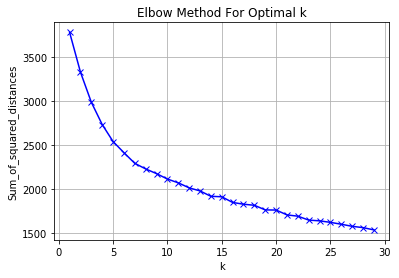

In [51]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [52]:
kmeans = KMeans(n_clusters = 7, random_state = 0)  
kmeans.fit(data) 


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [53]:
cluster_map = data
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = kmeans.labels_

cluster_map.to_csv('kmeans.csv')
cluster_map.head()


,price_per_sqm,apartment,house,number_of_whole_rooms,floor,number_of_half_rooms,furnish_furnished,furnish_partly_furnished,view_garden,view_panoramic,...,heating_floor,heating_circulating,heating_district,available_immediately,condition_of_property_renovated,parking,longitude,latitude,data_index,cluster
9,10.725806,1,0,2.0,1.0,0.0,1.0,0.0,0,0,...,0.0,0.0,0.0,1.0,1,1.0,19.069523,47.499779,9,4
37,11.166667,1,0,1.0,2.0,0.0,0.0,1.0,0,0,...,0.0,0.0,0.0,1.0,0,0.0,19.058190,47.498288,37,4
44,7.584906,1,0,1.0,3.0,0.0,1.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0,0.0,19.049162,47.512499,44,1
45,15.000000,1,0,3.0,3.0,0.0,0.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0,1.0,19.032098,47.507276,45,0
49,9.763158,1,0,1.0,4.0,0.0,1.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0,1.0,19.069391,47.518671,49,4


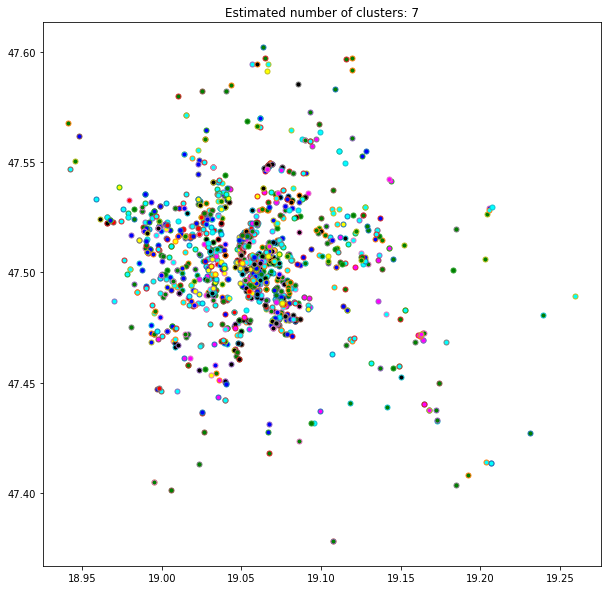

In [62]:
fig, ax = plt.subplots(figsize=[10, 10])

for index, row in cluster_map.iterrows():
    if row['cluster'] == 0:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='blue', markersize=5)
    elif row['cluster'] == 1:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='green', markersize=5)
    elif row['cluster'] == 2:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='red', markersize=5)
    elif row['cluster'] == 3:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='yellow', markersize=5)
    elif row['cluster'] == 4:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='cyan', markersize=5)
    elif row['cluster'] == 5:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='magenta', markersize=5)
    elif row['cluster'] == 6:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='black', markersize=5)

plt.title('Estimated number of clusters: 7')
plt.show()


In [68]:
cluster_map['price_per_sqm'].describe()


count    1252.000000
mean       11.833267
std         4.033845
min         3.657143
25%         9.000000
50%        10.960934
75%        13.452581
max        34.475733
Name: price_per_sqm, dtype: float64

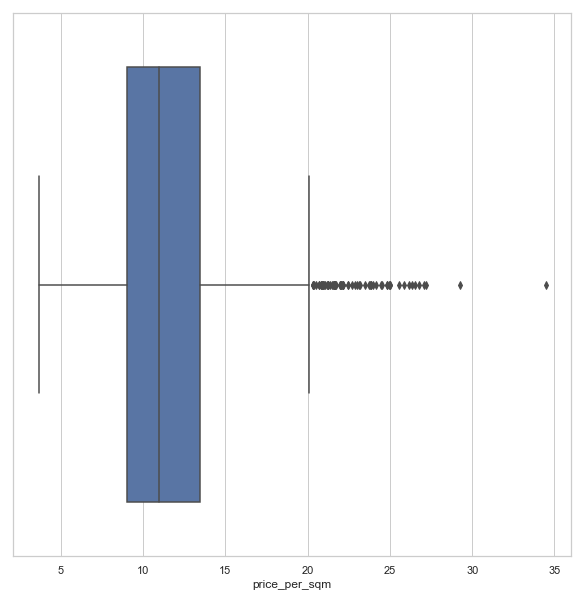

In [66]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxplot(cluster_map['price_per_sqm'])


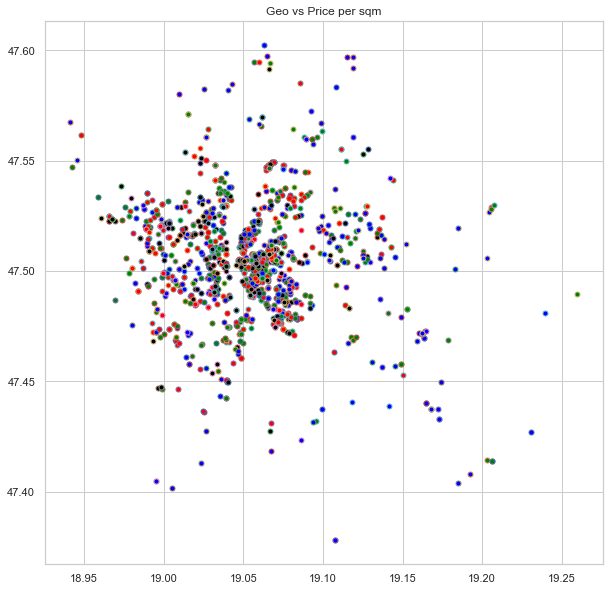

In [69]:
fig, ax = plt.subplots(figsize=[10, 10])

for index, row in cluster_map.iterrows():
    if row['price_per_sqm'] <= 9:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='blue', markersize=5)
    elif row['price_per_sqm'] <= 10.96:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='green', markersize=5)
    elif row['price_per_sqm'] <= 13.45:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='red', markersize=5)
    else:
        plt.plot(row['longitude'], row['latitude'], 'o', markerfacecolor='black', markersize=5)

plt.title('Geo vs Price per sqm')
plt.show()
